In [1]:
from paddleocr import PaddleOCR
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import numpy as np
import TableExtractor as te

# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='id') # need to run only once to download and load model into memory

[2024/11/29 21:38:49] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\RYZEN 5/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\RYZEN 5/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_

In [2]:
img_path = './testing_img/IMG-20240528-WA0015 - Copy.jpg'

In [3]:
def get_table_image(image_path):
    table_extractor = te.TableExtractor(image_path)
    return table_extractor.execute()

In [4]:
def get_ocr(table_image):
    result = ocr.ocr(table_image, cls=True)
    return result

In [13]:
def draw_ocr_result(table_image, image_path, result):
    image = Image.fromarray(table_image)
    draw = ImageDraw.Draw(image)
    if result[0] != None:
        result = result[0]
        for i, box in enumerate(result):
            box = np.array(box[0]).astype(np.int32)
            xmin = min(box[:, 0])
            ymin = min(box[:, 1])
            xmax = max(box[:, 0])
            ymax = max(box[:, 1])
            draw.rectangle((xmin, ymin, xmax, ymax), outline="green", width=3)
            draw.text((xmin, ymin), f"{i}", fill="black")
        
    plt.figure(figsize=(8, 8))  # Set the figure size
    plt.imshow(image)
    plt.axis('off')  # Hide axes for cleaner visualization
    plt.title(image_path.split('/')[-1])
    plt.show()

[2024/11/29 21:44:34] ppocr DEBUG: dt_boxes num : 29, elapsed : 1.4059839248657227
[2024/11/29 21:44:34] ppocr DEBUG: cls num  : 29, elapsed : 0.35497045516967773
[2024/11/29 21:44:36] ppocr DEBUG: rec_res num  : 29, elapsed : 1.4919767379760742


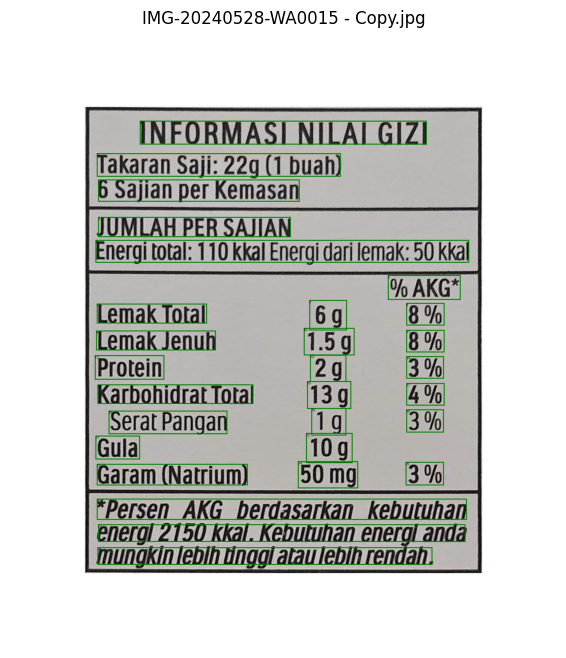

[2024/11/29 21:44:42] ppocr DEBUG: dt_boxes num : 27, elapsed : 1.6789679527282715
[2024/11/29 21:44:42] ppocr DEBUG: cls num  : 27, elapsed : 0.23600125312805176
[2024/11/29 21:44:43] ppocr DEBUG: rec_res num  : 27, elapsed : 1.3619952201843262


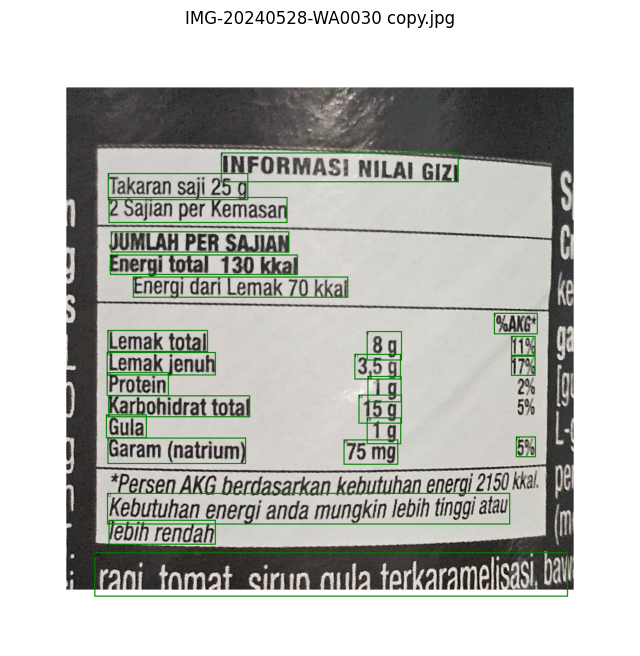

[2024/11/29 21:44:57] ppocr DEBUG: dt_boxes num : 33, elapsed : 1.329998254776001
[2024/11/29 21:44:57] ppocr DEBUG: cls num  : 33, elapsed : 0.1619873046875
[2024/11/29 21:44:59] ppocr DEBUG: rec_res num  : 33, elapsed : 1.8179986476898193


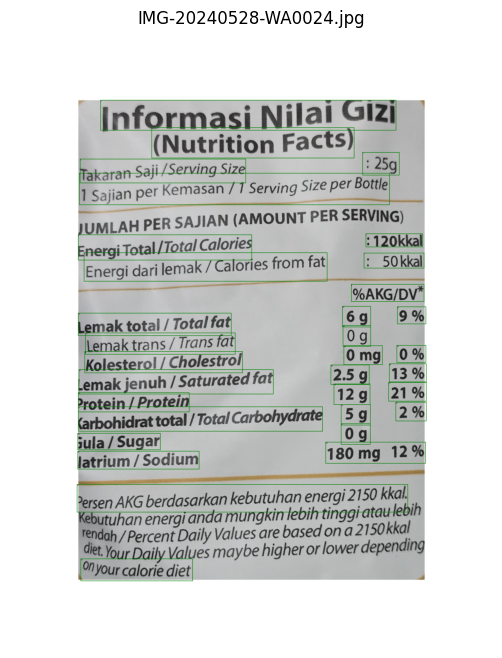

[2024/11/29 21:45:14] ppocr DEBUG: dt_boxes num : 0, elapsed : 1.0890090465545654
[2024/11/29 21:45:14] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/11/29 21:45:14] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0


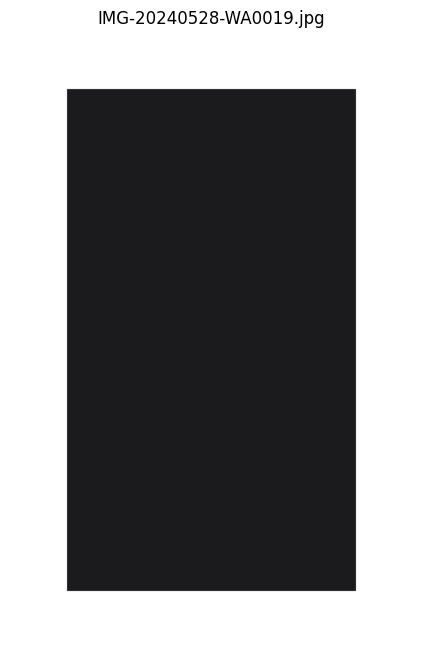

In [14]:
img_path = [
    './testing_img/IMG-20240528-WA0015 - Copy.jpg',
    './testing_img/IMG-20240528-WA0030 copy.jpg',
    './testing_img/IMG-20240528-WA0024.jpg',
    './testing_img/IMG-20240528-WA0019.jpg',
    
]

ocr_results = []

for img in img_path:
    img_table = get_table_image(img)
    result = get_ocr(img_table)
    draw_ocr_result(img_table, img, result)
    ocr_results.append(result)
    

In [15]:
for idx in range(len(ocr_results[2][0])):
    res = result[idx]
    for line in res:
        print(line)

TypeError: 'NoneType' object is not iterable